In [2]:
!pip install matplotlib

  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


You should consider upgrading via the 'c:\users\hp\dropbox\pc\documents\programming\python machine learning\projects\face recognition\env\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import os
import numpy
import cv2
import matplotlib.pyplot as plt
import face_recognition

In [2]:
KNOWN_FACES_DIR = "knowned"

UNKNOWN_FACES_DIR = "unknowed"

TOLERANCE = 0.4

FRAME_THICKNESS = 10

FONT_THICKNESS = 2

MODEL ="hog"



In [3]:
images = []

known_faces = []

known_names = []

face_locations = []


for name in os.listdir(os.path.join(os.getcwd(), KNOWN_FACES_DIR)):
    print("Name", name)

    for image_filename in os.listdir(os.path.join(os.getcwd(), f'{KNOWN_FACES_DIR}/{name}')):
        
        print("Image Filename", image_filename)
        
        image = face_recognition.load_image_file(os.path.join(os.getcwd(), f'{KNOWN_FACES_DIR}/{name}/{image_filename}'))
        
        encoding = face_recognition.face_encodings(image, model=MODEL)[0]
        
        locations = face_recognition.face_locations(image)[0]
        
        face_locations.append(locations)
        
        images.append(image)
        
        known_faces.append(encoding)
        
        known_names.append(name)
        


Name wisdom
Image Filename .trashed-1692256107-IMG_20230718_080818_649.jpg
Image Filename IMG_20230620_103709_839.jpg
Image Filename IMG_20230620_103744_991.jpg
Image Filename IMG_20230620_103811_492.jpg
Image Filename IMG_20230620_103812_775.jpg
Image Filename Snapchat-1263372439.jpg
Image Filename Snapchat-843564179.jpg


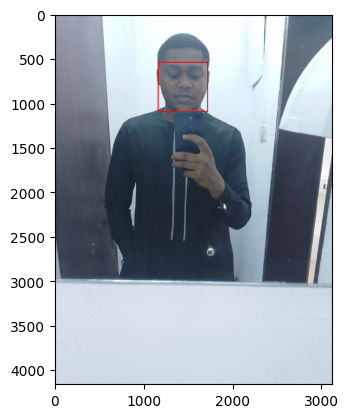

In [4]:
top_left = (face_locations[1][3], face_locations[1][0])

bottom_right = (face_locations[1][1], face_locations[1][2])
            
color = [255, 0, 0]

detect_face = cv2.rectangle(images[1], top_left, bottom_right, color, FRAME_THICKNESS)

plt.imshow(detect_face)

In [5]:
found_faces = []

for unknown_image_filename in os.listdir(UNKNOWN_FACES_DIR):
    print(unknown_image_filename)
    
    image = face_recognition.load_image_file(os.path.join(UNKNOWN_FACES_DIR, unknown_image_filename))
    
    locations = face_recognition.face_locations(image)
    
    encodings = face_recognition.face_encodings(image, locations, model=MODEL)
    
    bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    for face_encoding, face_location in zip(encodings, locations):
        
        results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)

        match = None

        if True in results:

            match = known_names[results.index(True)]

            top_left = (face_location[3], face_location[0])

            bottom_right = (face_location[1], face_location[2] + 22)

            color = [0, 255, 0]
            
            detect_face = cv2.rectangle(image, top_left, bottom_right, color, FRAME_THICKNESS)

            print((face_location[3], face_location[2]))
            

            

            font = cv2.FONT_HERSHEY_SIMPLEX

            org = (face_location[3] + 380, face_location[2])
              
            # fontScale
            fontScale = 5
               
            # Blue color in BGR
            color = (200, 200, 200)
              
            # Line thickness of 2 px
            thickness = 5
               
            # Using cv2.putText() method
            detect_face = cv2.putText(detect_face, match, org, font, 
                               fontScale, color, thickness, cv2.LINE_AA)
            
            
            found_faces.append(detect_face)
            
        else:
            top_left = (face_location[3], face_location[0])
            bottom_right = (face_location[1], face_location[2] + 22)
            color = [255, 255, 0]
            detect_face = cv2.rectangle(bgr_image, top_left, bottom_right, color, FRAME_THICKNESS)
            detect_face = cv2.putText(
                detect_face, 'Unknown', (face_location[3] + 10, face_location[2] + 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), FONT_THICKNESS
            )
            found_faces.append(detect_face)


joshua1.jpg
joshua2.jpg
joshua3.jpg
wisdom1.jpg
(613, 2530)
wisdom2.jpg
(613, 2147)
wisdom3.jpg
(613, 2147)
wisdom4.jpg
(1157, 1096)


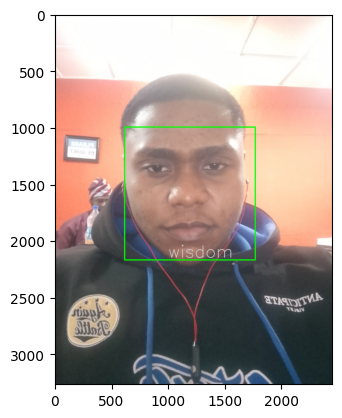

In [6]:
plt.imshow(found_faces[8])

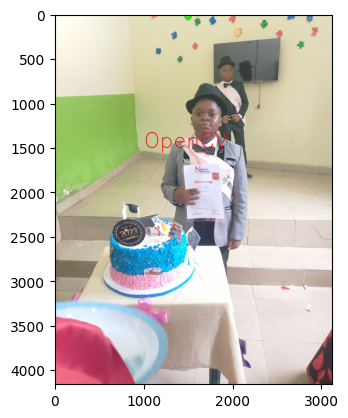

In [12]:
import cv2
    
# path
path = 'joshua1.jpg'
    
# Reading an image in default mode
# image = cv2.imread(path)

image = face_recognition.load_image_file(path)

# Window name in which image is displayed
window_name = 'Image'
  
# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (1000, 1500)
  
# fontScale
fontScale = 8
   
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 8
   
# Using cv2.putText() method
image = cv2.putText(image, 'OpenCV', org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
   
# Displaying the image
# cv2.imshow(window_name, image)

# cv2.waitKey(0)
    
# cv2.destroyWindow(path)

plt.imshow(image)


## WITH VIDEO

In [9]:
video = cv2.VideoCapture(2)


< cv2.VideoCapture 0000017811A4B330>

In [ ]:
found_faces = []

# for unknown_image_filename in os.listdir(UNKNOWN_FACES_DIR):

while True:
    # print(unknown_image_filename)

    ret, image = video.read()
    
    image = face_recognition.load_image_file(os.path.join(UNKNOWN_FACES_DIR, unknown_image_filename))
    
    locations = face_recognition.face_locations(image)
    
    encodings = face_recognition.face_encodings(image, locations, model=MODEL)
    
    # bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    for face_encoding, face_location in zip(encodings, locations):
        
        results = face_recognition.compare_faces(known_faces, face_encoding, TOLERANCE)

        match = None

        if True in results:

            match = known_names[results.index(True)]

            top_left = (face_location[3], face_location[0])

            bottom_right = (face_location[1], face_location[2] + 22)

            color = [0, 255, 0]
            
            detect_face = cv2.rectangle(image, top_left, bottom_right, color, FRAME_THICKNESS)

            print((face_location[3], face_location[2]))
            

            

            font = cv2.FONT_HERSHEY_SIMPLEX

            org = (face_location[3] + 380, face_location[2])
              
            # fontScale
            fontScale = 5
               
            # Blue color in BGR
            color = (200, 200, 200)
              
            # Line thickness of 2 px
            thickness = 5
               
            # Using cv2.putText() method
            detect_face = cv2.putText(detect_face, match, org, font, 
                               fontScale, color, thickness, cv2.LINE_AA)
            
            
            found_faces.append(detect_face)
            
        else:
            top_left = (face_location[3], face_location[0])
            bottom_right = (face_location[1], face_location[2] + 22)
            color = [255, 255, 0]
            detect_face = cv2.rectangle(bgr_image, top_left, bottom_right, color, FRAME_THICKNESS)
            detect_face = cv2.putText(
                detect_face, 'Unknown', (face_location[3] + 10, face_location[2] + 15),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 200, 200), FONT_THICKNESS
            )
            found_faces.append(detect_face)
